In [1]:
# https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter07/02-solve-zoo.py
import random

from pandas import read_csv
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import os
import pandas as pd

from deap import base
from deap import creator
from deap import tools

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

import elitism
import radiomics

In [2]:
# Genetic Algorithm constants:
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.2   # probability for mutating an individual
MAX_GENERATIONS = 10000
HALL_OF_FAME_SIZE = 5

FEATURE_PENALTY_FACTOR = 0.001

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [3]:
rad = radiomics.Radiomics(RANDOM_SEED)

/home/manos/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [4]:
toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(rad))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [5]:
# fitness calculation
def radiomicsClassificationAccuracy(individual):
    numFeaturesUsed = sum(individual)
    if numFeaturesUsed == 0:
        return 0.0,
    else:
        accuracy = rad.getMeanAccuracy(individual)
        return accuracy - FEATURE_PENALTY_FACTOR * numFeaturesUsed,  # return a tuple

In [6]:
toolbox.register("evaluate", radiomicsClassificationAccuracy)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 2:
toolbox.register("select", tools.selTournament, tournsize=2)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(rad))

gen	nevals	max       	avg      
0  	200   	-0.0619261	-0.167769
1  	171   	-0.0619261	-0.150021
2  	175   	-0.0619261	-0.138441
3  	180   	-0.0577044	-0.122707
4  	179   	-0.0288473	-0.112256
5  	180   	-0.0164581	-0.0992772
6  	177   	-0.0164581	-0.0841794
7  	178   	-0.00160099	-0.0708706
8  	172   	0.00639901 	-0.0598306
9  	190   	0.00719212 	-0.050504 
10 	177   	0.0302315  	-0.0424817
11 	177   	0.0407882  	-0.0277032
12 	181   	0.052931   	-0.0150587
13 	178   	0.052931   	-0.00112404
14 	178   	0.0756601  	0.00906677 
15 	174   	0.0756601  	0.0186986  
16 	181   	0.0825172  	0.0317126  
17 	174   	0.0845172  	0.0398068  
18 	188   	0.0876601  	0.0495829  
19 	177   	0.0946601  	0.0575605  
20 	170   	0.0946601  	0.0673948  
21 	170   	0.0976601  	0.0753637  
22 	179   	0.0996601  	0.0821444  
23 	174   	0.10266    	0.0869848  
24 	179   	0.10466    	0.09095    
25 	171   	0.10666    	0.0950092  
26 	176   	0.10866    	0.0981278  
27 	180   	0.11166    	0.100858   
28 	185   	0.

234	172   	0.351946   	0.346655   
235	182   	0.351946   	0.347722   
236	176   	0.353946   	0.348951   
237	180   	0.353946   	0.349817   
238	187   	0.353946   	0.350379   
239	176   	0.355946   	0.351443   
240	174   	0.356946   	0.352109   
241	178   	0.356946   	0.352735   
242	180   	0.357946   	0.353655   
243	186   	0.357946   	0.354312   
244	179   	0.358946   	0.355077   
245	188   	0.358946   	0.355528   
246	190   	0.360946   	0.356629   
247	174   	0.360946   	0.357365   
248	181   	0.361946   	0.357986   
249	182   	0.363946   	0.358939   
250	187   	0.363946   	0.359467   
251	177   	0.364946   	0.360471   
252	184   	0.365946   	0.361333   
253	176   	0.368089   	0.362143   
254	183   	0.371089   	0.363196   
255	182   	0.371089   	0.364256   
256	179   	0.372089   	0.364828   
257	179   	0.373089   	0.366044   
258	173   	0.376089   	0.366887   
259	182   	0.376089   	0.367695   
260	181   	0.376089   	0.368869   
261	191   	0.378089   	0.370327   
262	186   	0.379089 

469	184   	0.567517   	0.561637   
470	179   	0.567517   	0.562176   
471	167   	0.567517   	0.563587   
472	179   	0.568517   	0.564315   
473	183   	0.569517   	0.565049   
474	184   	0.570517   	0.566042   
475	177   	0.570517   	0.566614   
476	186   	0.571517   	0.56764    
477	183   	0.574517   	0.56848    
478	177   	0.574517   	0.56878    
479	183   	0.574517   	0.569564   
480	189   	0.575517   	0.570406   
481	186   	0.575517   	0.571173   
482	183   	0.576517   	0.572249   
483	184   	0.576517   	0.573256   
484	184   	0.577517   	0.573809   
485	184   	0.578517   	0.574494   
486	181   	0.579517   	0.574876   
487	180   	0.580517   	0.575957   
488	181   	0.581517   	0.576671   
489	183   	0.581517   	0.577179   
490	180   	0.582517   	0.578487   
491	179   	0.582517   	0.57956    
492	170   	0.584517   	0.580372   
493	177   	0.584517   	0.580838   
494	175   	0.585517   	0.581584   
495	172   	0.585517   	0.582184   
496	182   	0.587517   	0.582796   
497	183   	0.587517 

704	174   	0.708517   	0.705107   
705	179   	0.708517   	0.705606   
706	184   	0.708517   	0.705531   
707	182   	0.709517   	0.706314   
708	170   	0.710517   	0.706811   
709	187   	0.710517   	0.707203   
710	177   	0.710517   	0.707753   
711	186   	0.711517   	0.708535   
712	174   	0.713517   	0.709361   
713	180   	0.713517   	0.709901   
714	181   	0.714517   	0.710445   
715	182   	0.715517   	0.710937   
716	182   	0.715517   	0.711759   
717	172   	0.716517   	0.712579   
718	187   	0.717517   	0.71279    
719	176   	0.717517   	0.714067   
720	178   	0.717517   	0.714805   
721	183   	0.718517   	0.715335   
722	175   	0.718517   	0.715622   
723	184   	0.719517   	0.715686   
724	162   	0.719517   	0.717117   
725	183   	0.720517   	0.717573   
726	177   	0.720517   	0.718091   
727	172   	0.720517   	0.718502   
728	182   	0.721517   	0.718474   
729	172   	0.721517   	0.719233   
730	179   	0.722517   	0.719614   
731	171   	0.723517   	0.719875   
732	170   	0.723517 

939	176   	0.77866    	0.776836   
940	186   	0.77866    	0.776889   
941	175   	0.77866    	0.777058   
942	179   	0.77866    	0.777645   
943	184   	0.77866    	0.777745   
944	182   	0.77966    	0.777654   
945	182   	0.77966    	0.777763   
946	170   	0.77966    	0.778022   
947	184   	0.77966    	0.77838    
948	186   	0.77966    	0.778385   
949	186   	0.77966    	0.777969   
950	183   	0.77966    	0.77857    
951	175   	0.77966    	0.778712   
952	180   	0.77966    	0.779031   
953	185   	0.77966    	0.779038   
954	176   	0.77966    	0.778843   
955	181   	0.77966    	0.779089   
956	180   	0.77966    	0.778839   
957	170   	0.77966    	0.778813   
958	173   	0.77966    	0.779429   
959	170   	0.77966    	0.778792   
960	176   	0.77966    	0.7792     
961	180   	0.77966    	0.779022   
962	177   	0.77966    	0.779149   
963	184   	0.77966    	0.779294   
964	184   	0.77966    	0.779225   
965	181   	0.77966    	0.778826   
966	180   	0.78066    	0.779144   
967	174   	0.78066  

1169	179   	0.78766    	0.787207   
1170	169   	0.78766    	0.786978   
1171	183   	0.78766    	0.787434   
1172	181   	0.78766    	0.787267   
1173	177   	0.78766    	0.786957   
1174	181   	0.78766    	0.787171   
1175	175   	0.78766    	0.786538   
1176	185   	0.78766    	0.787222   
1177	182   	0.78766    	0.787208   
1178	176   	0.78766    	0.78725    
1179	180   	0.78766    	0.787197   
1180	171   	0.78766    	0.786874   
1181	179   	0.78766    	0.787217   
1182	181   	0.78766    	0.787154   
1183	174   	0.78766    	0.786861   
1184	176   	0.78766    	0.786809   
1185	184   	0.78766    	0.787049   
1186	181   	0.78766    	0.787165   
1187	181   	0.78766    	0.786971   
1188	178   	0.78766    	0.787317   
1189	181   	0.78766    	0.787272   
1190	174   	0.78766    	0.787037   
1191	182   	0.78766    	0.786765   
1192	171   	0.78766    	0.787328   
1193	183   	0.78766    	0.786982   
1194	181   	0.78766    	0.786624   
1195	188   	0.78766    	0.787038   
1196	188   	0.78766    	0.78

1397	182   	0.78766    	0.786937   
1398	177   	0.78766    	0.786795   
1399	177   	0.78766    	0.787262   
1400	178   	0.78766    	0.787083   
1401	176   	0.78766    	0.786864   
1402	191   	0.78766    	0.787282   
1403	174   	0.78766    	0.78696    
1404	180   	0.78766    	0.787313   
1405	182   	0.78766    	0.787077   
1406	177   	0.78766    	0.786806   
1407	177   	0.78766    	0.786965   
1408	176   	0.78766    	0.787019   
1409	181   	0.78766    	0.787113   
1410	182   	0.78766    	0.786802   
1411	174   	0.78766    	0.787      
1412	181   	0.78766    	0.787034   
1413	185   	0.78766    	0.787256   
1414	174   	0.78766    	0.786948   
1415	184   	0.78766    	0.787129   
1416	179   	0.78766    	0.787252   
1417	184   	0.78766    	0.787206   
1418	179   	0.78766    	0.787338   
1419	170   	0.78766    	0.786601   
1420	181   	0.78766    	0.787211   
1421	180   	0.78766    	0.787129   
1422	183   	0.78766    	0.787022   
1423	176   	0.78766    	0.786951   
1424	176   	0.78766    	0.78

1625	182   	0.78766    	0.786795   
1626	180   	0.78766    	0.787129   
1627	182   	0.78766    	0.78653    
1628	182   	0.78766    	0.786853   
1629	180   	0.78766    	0.787288   
1630	174   	0.78766    	0.787201   
1631	182   	0.78766    	0.787242   
1632	185   	0.78766    	0.787159   
1633	184   	0.78766    	0.787005   
1634	177   	0.78766    	0.787043   
1635	182   	0.78766    	0.787255   
1636	182   	0.78766    	0.786962   
1637	169   	0.78766    	0.787279   
1638	178   	0.78766    	0.787099   
1639	186   	0.78766    	0.786746   
1640	176   	0.78766    	0.786994   
1641	180   	0.78766    	0.787126   
1642	187   	0.78766    	0.786839   
1643	177   	0.78766    	0.787344   
1644	167   	0.78766    	0.786834   
1645	184   	0.78766    	0.787293   
1646	172   	0.78766    	0.786691   
1647	181   	0.78766    	0.787152   
1648	182   	0.78766    	0.78696    
1649	182   	0.78766    	0.787139   
1650	183   	0.78766    	0.787068   
1651	184   	0.78766    	0.787013   
1652	172   	0.78766    	0.78

1853	185   	0.78766    	0.78693    
1854	177   	0.78766    	0.787147   
1855	180   	0.78766    	0.787323   
1856	171   	0.78766    	0.787137   
1857	165   	0.78766    	0.787302   
1858	170   	0.78766    	0.786902   
1859	184   	0.78766    	0.787028   
1860	173   	0.78766    	0.787129   
1861	171   	0.78766    	0.787186   
1862	183   	0.78766    	0.786815   
1863	188   	0.78766    	0.787335   
1864	186   	0.78766    	0.787091   
1865	177   	0.78766    	0.787444   
1866	173   	0.78766    	0.786329   
1867	184   	0.78766    	0.787171   
1868	177   	0.78766    	0.787101   
1869	170   	0.78766    	0.787174   
1870	177   	0.78766    	0.787218   
1871	173   	0.78766    	0.787169   
1872	177   	0.78766    	0.787191   
1873	177   	0.78766    	0.786883   
1874	174   	0.78766    	0.786866   
1875	176   	0.78766    	0.786778   
1876	177   	0.78766    	0.786594   
1877	180   	0.78766    	0.787073   
1878	183   	0.78766    	0.787055   
1879	169   	0.78766    	0.786716   
1880	181   	0.78766    	0.78

2081	177   	0.78766    	0.787222   
2082	186   	0.78766    	0.786706   
2083	181   	0.78766    	0.787298   
2084	183   	0.78766    	0.787215   
2085	194   	0.78766    	0.787347   
2086	178   	0.78766    	0.787332   
2087	179   	0.78766    	0.787271   
2088	177   	0.78766    	0.786896   
2089	182   	0.78766    	0.786869   
2090	178   	0.78766    	0.787342   
2091	178   	0.78766    	0.787368   
2092	181   	0.78766    	0.78719    
2093	176   	0.78766    	0.787049   
2094	181   	0.78766    	0.787245   
2095	176   	0.78766    	0.786686   
2096	172   	0.78766    	0.787204   
2097	183   	0.78766    	0.787121   
2098	179   	0.78766    	0.786999   
2099	185   	0.78766    	0.786767   
2100	189   	0.78766    	0.787163   
2101	174   	0.78766    	0.787198   
2102	185   	0.78766    	0.786942   
2103	189   	0.78766    	0.78689    
2104	177   	0.78766    	0.787153   
2105	182   	0.78766    	0.787069   
2106	174   	0.78766    	0.787363   
2107	175   	0.78766    	0.78703    
2108	176   	0.78766    	0.78

2309	190   	0.78766    	0.786929   
2310	175   	0.78766    	0.787238   
2311	175   	0.78766    	0.787086   
2312	167   	0.78766    	0.78729    
2313	183   	0.78766    	0.786904   
2314	182   	0.78766    	0.787266   
2315	186   	0.78766    	0.787227   
2316	186   	0.78766    	0.787176   
2317	178   	0.78766    	0.787368   
2318	180   	0.78766    	0.787049   
2319	171   	0.78766    	0.787293   
2320	184   	0.78766    	0.786911   
2321	177   	0.78766    	0.787256   
2322	175   	0.78766    	0.787013   
2323	185   	0.78766    	0.787179   
2324	185   	0.78766    	0.787187   
2325	176   	0.78766    	0.786489   
2326	183   	0.78766    	0.787033   
2327	178   	0.78766    	0.787236   
2328	176   	0.78766    	0.787343   
2329	175   	0.78766    	0.787043   
2330	180   	0.78766    	0.787298   
2331	175   	0.78766    	0.78682    
2332	174   	0.78766    	0.787023   
2333	180   	0.78766    	0.787066   
2334	179   	0.78766    	0.787072   
2335	179   	0.78766    	0.787154   
2336	165   	0.78766    	0.78

2537	183   	0.78766    	0.787014   
2538	182   	0.78766    	0.786799   
2539	179   	0.78766    	0.787114   
2540	173   	0.78766    	0.787035   
2541	181   	0.78766    	0.786824   
2542	184   	0.78766    	0.786716   
2543	174   	0.78766    	0.786889   
2544	172   	0.78766    	0.7868     
2545	176   	0.78766    	0.787003   
2546	174   	0.78766    	0.78718    
2547	179   	0.78766    	0.78668    
2548	170   	0.78766    	0.786854   
2549	178   	0.78766    	0.786988   
2550	178   	0.78766    	0.787069   
2551	173   	0.78766    	0.787084   
2552	169   	0.78766    	0.786887   
2553	179   	0.78766    	0.787163   
2554	173   	0.78766    	0.787211   
2555	180   	0.78766    	0.786951   
2556	174   	0.78766    	0.787376   
2557	181   	0.78766    	0.787078   
2558	175   	0.78766    	0.786734   
2559	182   	0.78766    	0.787198   
2560	183   	0.78766    	0.787295   
2561	171   	0.78766    	0.78715    
2562	183   	0.78766    	0.787001   
2563	183   	0.78766    	0.786943   
2564	177   	0.78766    	0.78

2765	174   	0.78766    	0.786965   
2766	182   	0.78766    	0.786906   
2767	180   	0.78766    	0.78741    
2768	175   	0.78766    	0.787145   
2769	182   	0.78766    	0.787072   
2770	173   	0.78766    	0.786856   
2771	180   	0.78766    	0.786758   
2772	180   	0.78766    	0.786877   
2773	180   	0.78766    	0.787222   
2774	177   	0.78766    	0.786689   
2775	188   	0.78766    	0.786836   
2776	186   	0.78766    	0.786992   
2777	174   	0.78766    	0.78694    
2778	178   	0.78766    	0.787092   
2779	185   	0.78766    	0.78717    
2780	181   	0.78766    	0.787149   
2781	177   	0.78766    	0.786395   
2782	176   	0.78766    	0.78738    
2783	185   	0.78766    	0.786025   
2784	181   	0.78766    	0.786866   
2785	178   	0.78766    	0.787429   
2786	183   	0.78766    	0.7872     
2787	177   	0.78766    	0.787124   
2788	179   	0.78766    	0.787141   
2789	185   	0.78766    	0.78709    
2790	175   	0.78766    	0.787388   
2791	173   	0.78766    	0.787318   
2792	173   	0.78766    	0.78

2993	166   	0.78766    	0.786835   
2994	178   	0.78766    	0.78626    
2995	171   	0.78766    	0.786891   
2996	182   	0.78766    	0.787138   
2997	176   	0.78766    	0.787005   
2998	174   	0.78766    	0.786771   
2999	171   	0.78766    	0.787294   
3000	176   	0.78766    	0.787083   
3001	172   	0.78766    	0.786855   
3002	175   	0.78766    	0.786823   
3003	184   	0.78766    	0.787338   
3004	180   	0.78766    	0.786652   
3005	177   	0.78766    	0.787275   
3006	186   	0.78766    	0.787256   
3007	183   	0.78766    	0.787253   
3008	187   	0.78766    	0.787323   
3009	178   	0.78766    	0.786714   
3010	170   	0.78766    	0.786967   
3011	179   	0.78766    	0.787182   
3012	185   	0.78766    	0.787264   
3013	170   	0.78766    	0.787165   
3014	165   	0.78766    	0.78721    
3015	179   	0.78766    	0.787009   
3016	179   	0.78766    	0.786602   
3017	185   	0.78766    	0.786838   
3018	175   	0.78766    	0.787106   
3019	184   	0.78766    	0.786997   
3020	182   	0.78766    	0.78

3221	180   	0.78766    	0.786987   
3222	181   	0.78766    	0.787107   
3223	176   	0.78766    	0.786973   
3224	180   	0.78766    	0.787293   
3225	184   	0.78766    	0.787415   
3226	175   	0.78766    	0.786731   
3227	182   	0.78766    	0.786611   
3228	184   	0.78766    	0.78705    
3229	174   	0.78766    	0.787087   
3230	182   	0.78766    	0.787333   
3231	182   	0.78766    	0.787038   
3232	182   	0.78766    	0.787232   
3233	176   	0.78766    	0.787221   
3234	179   	0.78766    	0.78704    
3235	182   	0.78766    	0.787289   
3236	177   	0.78766    	0.787253   
3237	179   	0.78766    	0.78711    
3238	172   	0.78766    	0.786864   
3239	187   	0.78766    	0.787171   
3240	186   	0.78766    	0.787292   
3241	183   	0.78766    	0.787419   
3242	179   	0.78766    	0.787119   
3243	175   	0.78766    	0.787434   
3244	176   	0.78766    	0.78696    
3245	177   	0.78766    	0.787298   
3246	185   	0.78766    	0.786525   
3247	185   	0.78766    	0.787105   
3248	184   	0.78766    	0.78

3449	171   	0.78766    	0.78714    
3450	185   	0.78766    	0.786986   
3451	177   	0.78766    	0.787116   
3452	184   	0.78766    	0.787248   
3453	176   	0.78766    	0.787315   
3454	173   	0.78766    	0.787048   
3455	181   	0.78766    	0.787305   
3456	180   	0.78766    	0.787181   
3457	178   	0.78766    	0.787095   
3458	174   	0.78766    	0.787021   
3459	174   	0.78766    	0.786835   
3460	185   	0.78766    	0.786973   
3461	182   	0.78766    	0.787225   
3462	176   	0.78766    	0.786926   
3463	174   	0.78766    	0.786862   
3464	180   	0.78766    	0.786458   
3465	179   	0.78766    	0.786706   
3466	178   	0.78766    	0.787073   
3467	187   	0.78766    	0.787296   
3468	181   	0.78766    	0.787115   
3469	174   	0.78766    	0.78703    
3470	185   	0.78766    	0.787065   
3471	175   	0.78766    	0.786753   
3472	177   	0.78766    	0.78699    
3473	185   	0.78766    	0.786872   
3474	185   	0.78766    	0.786781   
3475	178   	0.78766    	0.786864   
3476	172   	0.78766    	0.78

3677	177   	0.78766    	0.787039   
3678	174   	0.78766    	0.787288   
3679	183   	0.78766    	0.787145   
3680	183   	0.78766    	0.787091   
3681	175   	0.78766    	0.786978   
3682	183   	0.78766    	0.786993   
3683	180   	0.78766    	0.786975   
3684	182   	0.78766    	0.787379   
3685	178   	0.78766    	0.786894   
3686	178   	0.78766    	0.786986   
3687	172   	0.78766    	0.787022   
3688	184   	0.78766    	0.786891   
3689	177   	0.78766    	0.787283   
3690	181   	0.78766    	0.786985   
3691	175   	0.78766    	0.787116   
3692	174   	0.78766    	0.787302   
3693	182   	0.78766    	0.787262   
3694	167   	0.78766    	0.787297   
3695	179   	0.78766    	0.786806   
3696	182   	0.78766    	0.787205   
3697	170   	0.78766    	0.787032   
3698	178   	0.78766    	0.787475   
3699	179   	0.78766    	0.787256   
3700	177   	0.78766    	0.787084   
3701	179   	0.78766    	0.787045   
3702	169   	0.78766    	0.787139   
3703	175   	0.78766    	0.787068   
3704	178   	0.78766    	0.78

3905	181   	0.78766    	0.787277   
3906	182   	0.78766    	0.787119   
3907	178   	0.78766    	0.787435   
3908	187   	0.78766    	0.786833   
3909	176   	0.78766    	0.787136   
3910	176   	0.78766    	0.78716    
3911	181   	0.78766    	0.787161   
3912	183   	0.78766    	0.787002   
3913	175   	0.78766    	0.787074   
3914	183   	0.78766    	0.787111   
3915	180   	0.78766    	0.787185   
3916	175   	0.78766    	0.787159   
3917	179   	0.78766    	0.78734    
3918	182   	0.78766    	0.787056   
3919	173   	0.78766    	0.787065   
3920	181   	0.78766    	0.787156   
3921	181   	0.78766    	0.787081   
3922	179   	0.78766    	0.78722    
3923	180   	0.78766    	0.787008   
3924	185   	0.78766    	0.78685    
3925	186   	0.78766    	0.786847   
3926	178   	0.78766    	0.787363   
3927	187   	0.78766    	0.78712    
3928	171   	0.78766    	0.786978   
3929	177   	0.78766    	0.786838   
3930	176   	0.78766    	0.786827   
3931	189   	0.78766    	0.787072   
3932	180   	0.78766    	0.78

4133	175   	0.78766    	0.786996   
4134	181   	0.78766    	0.786329   
4135	177   	0.78766    	0.786618   
4136	178   	0.78766    	0.786791   
4137	177   	0.78766    	0.787317   
4138	183   	0.78766    	0.786905   
4139	187   	0.78766    	0.786858   
4140	181   	0.78766    	0.78707    
4141	173   	0.78766    	0.786392   
4142	183   	0.78766    	0.786902   
4143	180   	0.78766    	0.786914   
4144	177   	0.78766    	0.78673    
4145	172   	0.78766    	0.786903   
4146	182   	0.78766    	0.786383   
4147	172   	0.78766    	0.787105   
4148	185   	0.78766    	0.787164   
4149	178   	0.78766    	0.787148   
4150	180   	0.78766    	0.786953   
4151	174   	0.78766    	0.786918   
4152	187   	0.78766    	0.786632   
4153	181   	0.78766    	0.786844   
4154	186   	0.78766    	0.787051   
4155	185   	0.78766    	0.786744   
4156	176   	0.78766    	0.786985   
4157	182   	0.78766    	0.786969   
4158	182   	0.78766    	0.786991   
4159	181   	0.78766    	0.787106   
4160	179   	0.78766    	0.78

4361	179   	0.78766    	0.786862   
4362	177   	0.78766    	0.787039   
4363	184   	0.78766    	0.787285   
4364	179   	0.78766    	0.78709    
4365	176   	0.78766    	0.787292   
4366	182   	0.78766    	0.787282   
4367	179   	0.78766    	0.78699    
4368	174   	0.78766    	0.787311   
4369	176   	0.78766    	0.786624   
4370	176   	0.78766    	0.786936   
4371	180   	0.78766    	0.787275   
4372	189   	0.78766    	0.78668    
4373	177   	0.78766    	0.786618   
4374	182   	0.78766    	0.787031   
4375	176   	0.78766    	0.787001   
4376	181   	0.78766    	0.787069   
4377	176   	0.78766    	0.78696    
4378	176   	0.78766    	0.786913   
4379	175   	0.78766    	0.787141   
4380	187   	0.78766    	0.786946   
4381	180   	0.78766    	0.786555   
4382	188   	0.78766    	0.787234   
4383	173   	0.78766    	0.787218   
4384	172   	0.78766    	0.787103   
4385	165   	0.78766    	0.787312   
4386	176   	0.78766    	0.787054   
4387	179   	0.78766    	0.786813   
4388	182   	0.78766    	0.78

4589	183   	0.78766    	0.786565   
4590	181   	0.78766    	0.786482   
4591	176   	0.78766    	0.787139   
4592	182   	0.78766    	0.787171   
4593	179   	0.78766    	0.786742   
4594	174   	0.78766    	0.787222   
4595	173   	0.78766    	0.787111   
4596	173   	0.78766    	0.787097   
4597	178   	0.78766    	0.787015   
4598	183   	0.78766    	0.787229   
4599	175   	0.78766    	0.787003   
4600	178   	0.78766    	0.78718    
4601	185   	0.78766    	0.78724    
4602	184   	0.78766    	0.787058   
4603	171   	0.78766    	0.786431   
4604	181   	0.78766    	0.787402   
4605	181   	0.78766    	0.787258   
4606	175   	0.78766    	0.787131   
4607	182   	0.78766    	0.787064   
4608	182   	0.78766    	0.786845   
4609	169   	0.78766    	0.787173   
4610	178   	0.78766    	0.787204   
4611	171   	0.78766    	0.787062   
4612	179   	0.78766    	0.787369   
4613	185   	0.78766    	0.787209   
4614	177   	0.78766    	0.787173   
4615	186   	0.78766    	0.787416   
4616	188   	0.78766    	0.78

4817	176   	0.78766    	0.786896   
4818	188   	0.78766    	0.786639   
4819	181   	0.78766    	0.787053   
4820	171   	0.78766    	0.787115   
4821	173   	0.78766    	0.786709   
4822	184   	0.78766    	0.786837   
4823	178   	0.78766    	0.787061   
4824	174   	0.78766    	0.787365   
4825	183   	0.78766    	0.787101   
4826	186   	0.78766    	0.786982   
4827	178   	0.78766    	0.787144   
4828	178   	0.78766    	0.78668    
4829	179   	0.78766    	0.78722    
4830	175   	0.78766    	0.786895   
4831	182   	0.78766    	0.787011   
4832	189   	0.78766    	0.787237   
4833	182   	0.78766    	0.787041   
4834	184   	0.78766    	0.787275   
4835	181   	0.78766    	0.787102   
4836	174   	0.78766    	0.787245   
4837	177   	0.78766    	0.787071   
4838	177   	0.78766    	0.787188   
4839	182   	0.78766    	0.78726    
4840	175   	0.78766    	0.787051   
4841	183   	0.78766    	0.787158   
4842	181   	0.78766    	0.787164   
4843	182   	0.78766    	0.787207   
4844	175   	0.78766    	0.78

5045	175   	0.78766    	0.787157   
5046	172   	0.78766    	0.787128   
5047	178   	0.78766    	0.787081   
5048	170   	0.78766    	0.787054   
5049	179   	0.78766    	0.7871     
5050	177   	0.78766    	0.787238   
5051	177   	0.78766    	0.787222   
5052	182   	0.78766    	0.787076   
5053	186   	0.78766    	0.787131   
5054	184   	0.78766    	0.786928   
5055	175   	0.78766    	0.787231   
5056	176   	0.78766    	0.787018   
5057	173   	0.78766    	0.78669    
5058	178   	0.78766    	0.786912   
5059	183   	0.78766    	0.787227   
5060	179   	0.78766    	0.78704    
5061	176   	0.78766    	0.787073   
5062	171   	0.78766    	0.786973   
5063	181   	0.78766    	0.787043   
5064	175   	0.78766    	0.78729    
5065	169   	0.78766    	0.786957   
5066	181   	0.78766    	0.786734   
5067	181   	0.78766    	0.787227   
5068	185   	0.78766    	0.787096   
5069	174   	0.78766    	0.787424   
5070	183   	0.78766    	0.786988   
5071	185   	0.78766    	0.787056   
5072	180   	0.78766    	0.78

5273	178   	0.78766    	0.786825   
5274	185   	0.78766    	0.786609   
5275	181   	0.78766    	0.787011   
5276	180   	0.78766    	0.786985   
5277	174   	0.78766    	0.787273   
5278	185   	0.78766    	0.786751   
5279	177   	0.78766    	0.78681    
5280	176   	0.78766    	0.78733    
5281	182   	0.78766    	0.787023   
5282	168   	0.78766    	0.786563   
5283	173   	0.78766    	0.78677    
5284	176   	0.78766    	0.786955   
5285	184   	0.78766    	0.786976   
5286	186   	0.78766    	0.787275   
5287	176   	0.78766    	0.786357   
5288	175   	0.78766    	0.787023   
5289	179   	0.78766    	0.787025   
5290	183   	0.78766    	0.786921   
5291	186   	0.78766    	0.787046   
5292	188   	0.78766    	0.786843   
5293	180   	0.78766    	0.786954   
5294	176   	0.78766    	0.78705    
5295	184   	0.78766    	0.786768   
5296	179   	0.78766    	0.786813   
5297	172   	0.78766    	0.787275   
5298	177   	0.78766    	0.787187   
5299	168   	0.78766    	0.787181   
5300	183   	0.78766    	0.78

5501	184   	0.78766    	0.787092   
5502	178   	0.78766    	0.787364   
5503	174   	0.78766    	0.787165   
5504	185   	0.78766    	0.78701    
5505	186   	0.78766    	0.786859   
5506	177   	0.78766    	0.787057   
5507	181   	0.78766    	0.787021   
5508	176   	0.78766    	0.787138   
5509	183   	0.78766    	0.787007   
5510	177   	0.78766    	0.786597   
5511	172   	0.78766    	0.787113   
5512	173   	0.78766    	0.787024   
5513	171   	0.78766    	0.78737    
5514	175   	0.78766    	0.786968   
5515	178   	0.78766    	0.787283   
5516	184   	0.78766    	0.787017   
5517	184   	0.78766    	0.787188   
5518	182   	0.78766    	0.786813   
5519	180   	0.78766    	0.7874     
5520	179   	0.78766    	0.787121   
5521	181   	0.78766    	0.786833   
5522	181   	0.78766    	0.787129   
5523	170   	0.78766    	0.787124   
5524	174   	0.78766    	0.787342   
5525	177   	0.78766    	0.786525   
5526	176   	0.78766    	0.787211   
5527	178   	0.78766    	0.787215   
5528	177   	0.78766    	0.78

5729	177   	0.78766    	0.787287   
5730	177   	0.78766    	0.787232   
5731	175   	0.78766    	0.787082   
5732	179   	0.78766    	0.787025   
5733	187   	0.78766    	0.787179   
5734	173   	0.78766    	0.787119   
5735	169   	0.78766    	0.786726   
5736	180   	0.78766    	0.786899   
5737	177   	0.78766    	0.786746   
5738	180   	0.78766    	0.787181   
5739	177   	0.78766    	0.786757   
5740	186   	0.78766    	0.787153   
5741	186   	0.78766    	0.786623   
5742	174   	0.78766    	0.786833   
5743	186   	0.78766    	0.787279   
5744	179   	0.78766    	0.786937   
5745	185   	0.78766    	0.786964   
5746	169   	0.78766    	0.7872     
5747	188   	0.78766    	0.78684    
5748	175   	0.78766    	0.78718    
5749	185   	0.78766    	0.786667   
5750	178   	0.78766    	0.787118   
5751	181   	0.78766    	0.786949   
5752	175   	0.78766    	0.787153   
5753	178   	0.78766    	0.786904   
5754	178   	0.78766    	0.786902   
5755	181   	0.78766    	0.786986   
5756	176   	0.78766    	0.78

5957	183   	0.78766    	0.786745   
5958	183   	0.78766    	0.786911   
5959	182   	0.78766    	0.787188   
5960	174   	0.78766    	0.78705    
5961	180   	0.78766    	0.787245   
5962	184   	0.78766    	0.786803   
5963	183   	0.78766    	0.787079   
5964	186   	0.78766    	0.787166   
5965	174   	0.78766    	0.78726    
5966	178   	0.78766    	0.787375   
5967	182   	0.78766    	0.786918   
5968	181   	0.78766    	0.787293   
5969	177   	0.78766    	0.787236   
5970	181   	0.78766    	0.787068   
5971	180   	0.78766    	0.78692    
5972	188   	0.78766    	0.786928   
5973	181   	0.78766    	0.786717   
5974	178   	0.78766    	0.78681    
5975	185   	0.78766    	0.786906   
5976	175   	0.78766    	0.786926   
5977	176   	0.78766    	0.786788   
5978	182   	0.78766    	0.786899   
5979	182   	0.78766    	0.786921   
5980	178   	0.78766    	0.786994   
5981	185   	0.78766    	0.787029   
5982	175   	0.78766    	0.787285   
5983	175   	0.78766    	0.78642    
5984	178   	0.78766    	0.78

6185	182   	0.78766    	0.786975   
6186	177   	0.78766    	0.78708    
6187	176   	0.78766    	0.786659   
6188	175   	0.78766    	0.786839   
6189	187   	0.78766    	0.786875   
6190	184   	0.78766    	0.787024   
6191	165   	0.78766    	0.786901   
6192	180   	0.78766    	0.786861   
6193	178   	0.78766    	0.786545   
6194	183   	0.78766    	0.78661    
6195	182   	0.78766    	0.786841   
6196	176   	0.78766    	0.786928   
6197	180   	0.78766    	0.78679    
6198	176   	0.78766    	0.786676   
6199	171   	0.78766    	0.786799   
6200	178   	0.78766    	0.787064   
6201	183   	0.78766    	0.786984   
6202	175   	0.78766    	0.786901   
6203	181   	0.78766    	0.786951   
6204	174   	0.78766    	0.786992   
6205	174   	0.78766    	0.787384   
6206	184   	0.78766    	0.787075   
6207	176   	0.78766    	0.786545   
6208	179   	0.78766    	0.786694   
6209	176   	0.78766    	0.787072   
6210	181   	0.78766    	0.786762   
6211	181   	0.78766    	0.786609   
6212	183   	0.78766    	0.78

6413	179   	0.78766    	0.787434   
6414	174   	0.78766    	0.787174   
6415	173   	0.78766    	0.786913   
6416	169   	0.78766    	0.786653   
6417	172   	0.78766    	0.787295   
6418	177   	0.78766    	0.787302   
6419	179   	0.78766    	0.786582   
6420	184   	0.78766    	0.787147   
6421	178   	0.78766    	0.787081   
6422	175   	0.78766    	0.786865   
6423	178   	0.78766    	0.786937   
6424	177   	0.78766    	0.787125   
6425	183   	0.78766    	0.786566   
6426	179   	0.78766    	0.78732    
6427	185   	0.78766    	0.786891   
6428	177   	0.78766    	0.786859   
6429	174   	0.78766    	0.786997   
6430	184   	0.78766    	0.786945   
6431	173   	0.78766    	0.786879   
6432	177   	0.78766    	0.786793   
6433	180   	0.78766    	0.786987   
6434	178   	0.78766    	0.787276   
6435	182   	0.78766    	0.787362   
6436	181   	0.78766    	0.787078   
6437	180   	0.78766    	0.787173   
6438	175   	0.78766    	0.787181   
6439	175   	0.78766    	0.78719    
6440	179   	0.78766    	0.78

6641	176   	0.78766    	0.787095   
6642	184   	0.78766    	0.786542   
6643	180   	0.78766    	0.787185   
6644	176   	0.78766    	0.786843   
6645	176   	0.78766    	0.786713   
6646	174   	0.78766    	0.787194   
6647	189   	0.78766    	0.786738   
6648	175   	0.78766    	0.786834   
6649	177   	0.78766    	0.78721    
6650	185   	0.78766    	0.787109   
6651	184   	0.78766    	0.787142   
6652	182   	0.78766    	0.786947   
6653	181   	0.78766    	0.78661    
6654	184   	0.78766    	0.786919   
6655	167   	0.78766    	0.786641   
6656	171   	0.78766    	0.786646   
6657	186   	0.78766    	0.786975   
6658	183   	0.78766    	0.786768   
6659	172   	0.78766    	0.787173   
6660	174   	0.78766    	0.786983   
6661	185   	0.78766    	0.787114   
6662	180   	0.78766    	0.787295   
6663	181   	0.78766    	0.787184   
6664	181   	0.78766    	0.786974   
6665	181   	0.78766    	0.78682    
6666	180   	0.78766    	0.787213   
6667	182   	0.78766    	0.786809   
6668	182   	0.78766    	0.78

6869	177   	0.78766    	0.786962   
6870	185   	0.78766    	0.787248   
6871	176   	0.78766    	0.786645   
6872	175   	0.78766    	0.787227   
6873	175   	0.78766    	0.787247   
6874	181   	0.78766    	0.787161   
6875	171   	0.78766    	0.786933   
6876	180   	0.78766    	0.786769   
6877	175   	0.78766    	0.78704    
6878	177   	0.78766    	0.786761   
6879	173   	0.78766    	0.787184   
6880	174   	0.78766    	0.78654    
6881	175   	0.78766    	0.786961   
6882	186   	0.78766    	0.786951   
6883	180   	0.78766    	0.786559   
6884	180   	0.78766    	0.787141   
6885	176   	0.78766    	0.786602   
6886	186   	0.78766    	0.787023   
6887	174   	0.78766    	0.787085   
6888	181   	0.78766    	0.786812   
6889	187   	0.78766    	0.787034   
6890	184   	0.78766    	0.786983   
6891	182   	0.78766    	0.786906   
6892	174   	0.78766    	0.787244   
6893	184   	0.78766    	0.787121   
6894	176   	0.78766    	0.786967   
6895	189   	0.78766    	0.786787   
6896	176   	0.78766    	0.78

7097	186   	0.78766    	0.787199   
7098	179   	0.78766    	0.787056   
7099	171   	0.78766    	0.787046   
7100	178   	0.78766    	0.786796   
7101	178   	0.78766    	0.78647    
7102	175   	0.78766    	0.786728   
7103	171   	0.78766    	0.786917   
7104	170   	0.78766    	0.786969   
7105	186   	0.78766    	0.786478   
7106	173   	0.78766    	0.78718    
7107	181   	0.78766    	0.787305   
7108	185   	0.78766    	0.786842   
7109	173   	0.78766    	0.786916   
7110	179   	0.78766    	0.786756   
7111	176   	0.78766    	0.787026   
7112	169   	0.78766    	0.78674    
7113	172   	0.78766    	0.786704   
7114	178   	0.78766    	0.787149   
7115	175   	0.78766    	0.787041   
7116	176   	0.78766    	0.787293   
7117	172   	0.78766    	0.787115   
7118	186   	0.78766    	0.787088   
7119	180   	0.78766    	0.786911   
7120	188   	0.78766    	0.786778   
7121	180   	0.78766    	0.786734   
7122	178   	0.78766    	0.786587   
7123	174   	0.78766    	0.786735   
7124	171   	0.78766    	0.78

7325	180   	0.78766    	0.787046   
7326	189   	0.78766    	0.786839   
7327	172   	0.78766    	0.787146   
7328	181   	0.78766    	0.787106   
7329	174   	0.78766    	0.786863   
7330	179   	0.78766    	0.7873     
7331	179   	0.78766    	0.786985   
7332	173   	0.78766    	0.787141   
7333	184   	0.78766    	0.787114   
7334	179   	0.78766    	0.787109   
7335	184   	0.78766    	0.786832   
7336	174   	0.78766    	0.787088   
7337	185   	0.78766    	0.787318   
7338	177   	0.78766    	0.787143   
7339	182   	0.78766    	0.787054   
7340	178   	0.78766    	0.786901   
7341	175   	0.78766    	0.787373   
7342	180   	0.78766    	0.787077   
7343	177   	0.78766    	0.786923   
7344	182   	0.78766    	0.787171   
7345	175   	0.78766    	0.786962   
7346	178   	0.78766    	0.787201   
7347	187   	0.78766    	0.787299   
7348	178   	0.78766    	0.787233   
7349	176   	0.78766    	0.787047   
7350	171   	0.78766    	0.787151   
7351	176   	0.78766    	0.78741    
7352	185   	0.78766    	0.78

7553	183   	0.78866    	0.787965   
7554	182   	0.78866    	0.787963   
7555	175   	0.78866    	0.788048   
7556	186   	0.78866    	0.788045   
7557	183   	0.78866    	0.788378   
7558	180   	0.78866    	0.787909   
7559	172   	0.78866    	0.788152   
7560	179   	0.78866    	0.788022   
7561	172   	0.78866    	0.788117   
7562	174   	0.78866    	0.788142   
7563	182   	0.78866    	0.788145   
7564	179   	0.78866    	0.787709   
7565	176   	0.78866    	0.787815   
7566	180   	0.78866    	0.787895   
7567	174   	0.78866    	0.787971   
7568	183   	0.78866    	0.78811    
7569	184   	0.78866    	0.787802   
7570	175   	0.78866    	0.788312   
7571	177   	0.78866    	0.788012   
7572	176   	0.78866    	0.788098   
7573	187   	0.78866    	0.787904   
7574	183   	0.78866    	0.787761   
7575	179   	0.78866    	0.788029   
7576	183   	0.78866    	0.788207   
7577	184   	0.78866    	0.788106   
7578	178   	0.78866    	0.787818   
7579	181   	0.78866    	0.787937   
7580	178   	0.78866    	0.78

7781	179   	0.794557   	0.793521   
7782	185   	0.794557   	0.794023   
7783	187   	0.794557   	0.794129   
7784	183   	0.794557   	0.79397    
7785	187   	0.794557   	0.793916   
7786	179   	0.794557   	0.793537   
7787	181   	0.794557   	0.79383    
7788	182   	0.794557   	0.79358    
7789	176   	0.794557   	0.794148   
7790	185   	0.794557   	0.793731   
7791	176   	0.794557   	0.79401    
7792	181   	0.794557   	0.794109   
7793	176   	0.794557   	0.79418    
7794	180   	0.794557   	0.794201   
7795	178   	0.794557   	0.793782   
7796	182   	0.794557   	0.794023   
7797	173   	0.794557   	0.793777   
7798	178   	0.794557   	0.793877   
7799	185   	0.794557   	0.792738   
7800	179   	0.794557   	0.794101   
7801	173   	0.794557   	0.794011   
7802	178   	0.794557   	0.793785   
7803	180   	0.794557   	0.793196   
7804	173   	0.794557   	0.793878   
7805	181   	0.794557   	0.794187   
7806	180   	0.794557   	0.794181   
7807	180   	0.794557   	0.793901   
7808	176   	0.794557   	0.79

8009	173   	0.794557   	0.794186   
8010	177   	0.794557   	0.79412    
8011	183   	0.794557   	0.793895   
8012	179   	0.794557   	0.793948   
8013	178   	0.794557   	0.794117   
8014	181   	0.794557   	0.793842   
8015	171   	0.794557   	0.793869   
8016	180   	0.794557   	0.793984   
8017	185   	0.794557   	0.793935   
8018	171   	0.794557   	0.793474   
8019	178   	0.794557   	0.79404    
8020	177   	0.794557   	0.794041   
8021	175   	0.794557   	0.793981   
8022	174   	0.794557   	0.794266   
8023	182   	0.794557   	0.794057   
8024	176   	0.794557   	0.793375   
8025	177   	0.794557   	0.794321   
8026	178   	0.794557   	0.793771   
8027	182   	0.794557   	0.79424    
8028	186   	0.794557   	0.794161   
8029	186   	0.794557   	0.794058   
8030	184   	0.794557   	0.79382    
8031	183   	0.794557   	0.794191   
8032	176   	0.794557   	0.794074   
8033	177   	0.794557   	0.793676   
8034	182   	0.794557   	0.793947   
8035	172   	0.794557   	0.794124   
8036	176   	0.794557   	0.79

8237	174   	0.794557   	0.793466   
8238	179   	0.794557   	0.792811   
8239	179   	0.794557   	0.793731   
8240	182   	0.794557   	0.793443   
8241	181   	0.794557   	0.793682   
8242	178   	0.794557   	0.793908   
8243	176   	0.794557   	0.793998   
8244	186   	0.794557   	0.793644   
8245	169   	0.794557   	0.793626   
8246	184   	0.794557   	0.793802   
8247	181   	0.794557   	0.79366    
8248	180   	0.794557   	0.793784   
8249	180   	0.794557   	0.792863   
8250	171   	0.794557   	0.793675   
8251	176   	0.794557   	0.7939     
8252	184   	0.794557   	0.79387    
8253	180   	0.794557   	0.793659   
8254	174   	0.794557   	0.79406    
8255	183   	0.794557   	0.794052   
8256	182   	0.794557   	0.793894   
8257	179   	0.794557   	0.794146   
8258	183   	0.794557   	0.79378    
8259	175   	0.794557   	0.794133   
8260	167   	0.794557   	0.794069   
8261	186   	0.794557   	0.793899   
8262	180   	0.794557   	0.793711   
8263	176   	0.794557   	0.793763   
8264	180   	0.794557   	0.79

8465	181   	0.794557   	0.794073   
8466	188   	0.794557   	0.793992   
8467	188   	0.794557   	0.793816   
8468	188   	0.794557   	0.793747   
8469	179   	0.794557   	0.793778   
8470	180   	0.794557   	0.793883   
8471	177   	0.794557   	0.793868   
8472	182   	0.794557   	0.793815   
8473	168   	0.794557   	0.793434   
8474	184   	0.794557   	0.793724   
8475	174   	0.794557   	0.794105   
8476	174   	0.794557   	0.793803   
8477	175   	0.794557   	0.793946   
8478	179   	0.794557   	0.793398   
8479	181   	0.794557   	0.793802   
8480	185   	0.794557   	0.793725   
8481	179   	0.794557   	0.793761   
8482	169   	0.794557   	0.793443   
8483	178   	0.794557   	0.793862   
8484	182   	0.794557   	0.794076   
8485	182   	0.794557   	0.793893   
8486	178   	0.794557   	0.793583   
8487	179   	0.794557   	0.793785   
8488	182   	0.794557   	0.793167   
8489	173   	0.794557   	0.793324   
8490	178   	0.794557   	0.793417   
8491	183   	0.794557   	0.793399   
8492	181   	0.794557   	0.79

8693	176   	0.794557   	0.793733   
8694	175   	0.794557   	0.793608   
8695	183   	0.794557   	0.793692   
8696	180   	0.794557   	0.79393    
8697	171   	0.794557   	0.793437   
8698	180   	0.794557   	0.793981   
8699	176   	0.794557   	0.793635   
8700	188   	0.794557   	0.793753   
8701	173   	0.794557   	0.793728   
8702	175   	0.794557   	0.793151   
8703	182   	0.794557   	0.793821   
8704	183   	0.794557   	0.793796   
8705	188   	0.794557   	0.793575   
8706	189   	0.794557   	0.793816   
8707	181   	0.794557   	0.793569   
8708	174   	0.794557   	0.794027   
8709	181   	0.794557   	0.793636   
8710	181   	0.794557   	0.793553   
8711	178   	0.794557   	0.793829   
8712	185   	0.794557   	0.793895   
8713	181   	0.794557   	0.793474   
8714	187   	0.794557   	0.793798   
8715	183   	0.794557   	0.793616   
8716	169   	0.794557   	0.793796   
8717	179   	0.794557   	0.79382    
8718	172   	0.794557   	0.793512   
8719	179   	0.794557   	0.793732   
8720	173   	0.794557   	0.79

8921	182   	0.8007     	0.800034   
8922	171   	0.8007     	0.79974    
8923	185   	0.8007     	0.800127   
8924	183   	0.8007     	0.799744   
8925	176   	0.8007     	0.800089   
8926	181   	0.8007     	0.800085   
8927	172   	0.8007     	0.799479   
8928	178   	0.8007     	0.800165   
8929	176   	0.8007     	0.800117   
8930	176   	0.8007     	0.799859   
8931	182   	0.8007     	0.799856   
8932	180   	0.8007     	0.800152   
8933	181   	0.8007     	0.800119   
8934	185   	0.8007     	0.800141   
8935	183   	0.8007     	0.799879   
8936	173   	0.8007     	0.800402   
8937	178   	0.8007     	0.800205   
8938	167   	0.8007     	0.800077   
8939	182   	0.8007     	0.800089   
8940	175   	0.8007     	0.800347   
8941	183   	0.8007     	0.800463   
8942	186   	0.8007     	0.800238   
8943	171   	0.8007     	0.800163   
8944	176   	0.8007     	0.800372   
8945	186   	0.8007     	0.79997    
8946	172   	0.8007     	0.800286   
8947	174   	0.8007     	0.80027    
8948	177   	0.8007     	0.79

9149	176   	0.8007     	0.799939   
9150	174   	0.8007     	0.800088   
9151	185   	0.8007     	0.80015    
9152	175   	0.8007     	0.799759   
9153	178   	0.8007     	0.80035    
9154	180   	0.8007     	0.800115   
9155	177   	0.8007     	0.800484   
9156	189   	0.8007     	0.799956   
9157	181   	0.8007     	0.800039   
9158	175   	0.8007     	0.800017   
9159	173   	0.8007     	0.799673   
9160	181   	0.8007     	0.800082   
9161	180   	0.8007     	0.800215   
9162	178   	0.8007     	0.800062   
9163	173   	0.8007     	0.799904   
9164	179   	0.8007     	0.799867   
9165	184   	0.8007     	0.800211   
9166	184   	0.8007     	0.800107   
9167	178   	0.8007     	0.799973   
9168	177   	0.8007     	0.800174   
9169	169   	0.8007     	0.800122   
9170	178   	0.8007     	0.800168   
9171	175   	0.8007     	0.800369   
9172	172   	0.8007     	0.800082   
9173	176   	0.8007     	0.800318   
9174	181   	0.8007     	0.800109   
9175	172   	0.8007     	0.800255   
9176	185   	0.8007     	0.80

9377	181   	0.8007     	0.800251   
9378	176   	0.8007     	0.799847   
9379	184   	0.8007     	0.800203   
9380	178   	0.8007     	0.799873   
9381	184   	0.8007     	0.799503   
9382	182   	0.8007     	0.800018   
9383	187   	0.8007     	0.799901   
9384	179   	0.8007     	0.79987    
9385	178   	0.8007     	0.800007   
9386	181   	0.8007     	0.799858   
9387	183   	0.8007     	0.8002     
9388	178   	0.8007     	0.799903   
9389	185   	0.8007     	0.800372   
9390	174   	0.8007     	0.800154   
9391	181   	0.8007     	0.79984    
9392	172   	0.8007     	0.800265   
9393	162   	0.8007     	0.800111   
9394	185   	0.8007     	0.800297   
9395	176   	0.8007     	0.799689   
9396	176   	0.8007     	0.79978    
9397	169   	0.8007     	0.800342   
9398	178   	0.8007     	0.799696   
9399	178   	0.8007     	0.800118   
9400	184   	0.8007     	0.800235   
9401	187   	0.8007     	0.800197   
9402	182   	0.8007     	0.79999    
9403	181   	0.8007     	0.800072   
9404	169   	0.8007     	0.79

9605	186   	0.8007     	0.800215   
9606	173   	0.8007     	0.800331   
9607	173   	0.8007     	0.799711   
9608	174   	0.8007     	0.800142   
9609	186   	0.8007     	0.799821   
9610	182   	0.8007     	0.799911   
9611	179   	0.8007     	0.800144   
9612	189   	0.8007     	0.799406   
9613	175   	0.8007     	0.799646   
9614	180   	0.8007     	0.799731   
9615	174   	0.8007     	0.800095   
9616	183   	0.8007     	0.79978    
9617	186   	0.8007     	0.799996   
9618	172   	0.8007     	0.799282   
9619	174   	0.8007     	0.800253   
9620	179   	0.8007     	0.8        
9621	178   	0.8007     	0.799885   
9622	178   	0.8007     	0.800026   
9623	178   	0.8007     	0.799501   
9624	184   	0.8007     	0.799369   
9625	179   	0.8007     	0.80019    
9626	176   	0.8007     	0.799551   
9627	177   	0.8007     	0.800145   
9628	177   	0.8007     	0.799473   
9629	176   	0.8007     	0.800018   
9630	180   	0.8007     	0.799721   
9631	183   	0.8007     	0.799551   
9632	184   	0.8007     	0.79

9833	184   	0.815985   	0.81513    
9834	181   	0.815985   	0.815204   
9835	186   	0.815985   	0.815367   
9836	187   	0.815985   	0.815094   
9837	177   	0.815985   	0.815233   
9838	181   	0.815985   	0.81461    
9839	175   	0.815985   	0.815317   
9840	178   	0.815985   	0.814807   
9841	178   	0.815985   	0.815277   
9842	168   	0.815985   	0.815414   
9843	181   	0.815985   	0.815147   
9844	185   	0.815985   	0.815369   
9845	179   	0.815985   	0.815525   
9846	178   	0.815985   	0.81504    
9847	170   	0.815985   	0.815399   
9848	176   	0.815985   	0.815342   
9849	177   	0.815985   	0.81453    
9850	182   	0.815985   	0.815062   
9851	158   	0.815985   	0.81551    
9852	173   	0.815985   	0.815334   
9853	178   	0.815985   	0.815412   
9854	181   	0.815985   	0.81492    
9855	179   	0.815985   	0.814955   
9856	176   	0.815985   	0.815266   
9857	189   	0.815985   	0.814971   
9858	176   	0.815985   	0.815139   
9859	171   	0.815985   	0.815577   
9860	183   	0.815985   	0.81

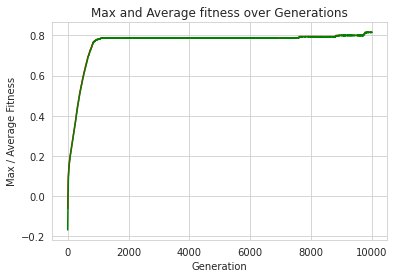

In [7]:
# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", numpy.max)
    stats.register("avg", numpy.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best solution found:
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i], ", fitness = ", hof.items[i].fitness.values[0],
              ", accuracy = ", rad.getMeanAccuracy(hof.items[i]), ", features = ", sum(hof.items[i]))

    # extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(maxFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Max / Average Fitness')
    plt.title('Max and Average fitness over Generations')
    plt.show()


if __name__ == "__main__":
    main()